导入库和数据

In [1]:
#import libraries
import pandas as pd # this imports the pandas library which is necessary for data frames and calls that library
 # can call all the functions of this library with "pd."
import numpy as np # same for numpy
import os
import matplotlib.pyplot as plt


In [2]:
df_plnt =pd.read_excel("https://www.epa.gov/system/files/documents/2022-01/egrid2020_data.xlsx", 
                       sheet_name="PLNT20",keep_default_na=False,header=1)
df_plnt.head(5)

,SEQPLT20,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,1,2020,AK,7-Mile Ridge Wind Project,60814,Alaska Power and Telephone Co,219,Alaska Power and Telephone Co,219,Electric Utility,...,,,,,,,,,,
1,2,2020,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,,,,,,,,,,
2,3,2020,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,,,,,,,,,,
3,4,2020,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
4,5,2020,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [3]:
#下面要转换一下数据格式，减少出错
df_plnt.CAPFAC=pd.to_numeric(df_plnt.CAPFAC)
df_plnt.NAMEPCAP=pd.to_numeric(df_plnt.NAMEPCAP)
df_plnt.PLHTIAN=pd.to_numeric(df_plnt.PLHTIAN)
df_plnt.PLNGENAN=pd.to_numeric(df_plnt.PLNGENAN)
df_plnt.PLCO2EQA=pd.to_numeric(df_plnt.PLCO2EQA)

In [4]:
df_plnt_all = df_plnt.loc[:,['PNAME', 'PSTATABB', 'PLFUELCT','BANAME', 
                              'CAPFAC','NAMEPCAP', 'PLHTIAN','PLNGENAN','PLCO2EQA']].copy()
df_plnt_all.head(n=10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA
0,7-Mile Ridge Wind Project,AK,WIND,No balancing authority,NaN,1.8,NaN,NaN,NaN
1,Agrium Kenai Nitrogen Operations,AK,GAS,No balancing authority,NaN,21.6,NaN,NaN,NaN
2,Alakanuk,AK,OIL,No balancing authority,0.00000,2.6,NaN,0.000,NaN
3,Allison Creek Hydro,AK,HYDRO,No balancing authority,0.36544,6.5,NaN,20808.000,NaN
4,Ambler,AK,OIL,No balancing authority,0.09224,1.5,11554.999,1212.000,946.849
5,Anchorage 1,AK,GAS,Chugach Electric Assn Inc,0.00719,121.4,115024.996,7646.000,6731.975
6,Angoon,AK,OIL,No balancing authority,0.09865,1.9,16506.999,1641.999,1352.626
7,Aniak,AK,OIL,No balancing authority,0.09585,2.6,26541.000,2183.001,2174.840
8,Annex Creek,AK,HYDRO,No balancing authority,0.74092,4.0,NaN,25962.000,NaN
9,Auke Bay,AK,OIL,No balancing authority,0.00000,36.2,5298.000,-143.000,434.132


In [5]:
# 4. Filter out all the plants that had zero or blank capacity factor in 2020 (i.e., Column AA in PLNT20 is zero or blank).
#Column L, Balancing Authority Code, is PJM Interconnection, LLC.
#-Column Y, Plant primary fuel category is equal to Coal, Gas, Hydro, or Nuclear. 
#-Column AA, Plant capacity factor, is 0.1 or greater. 
#-Column AB, Plant nameplate capacity (MW), is 10 or more

df_plnt_all.dropna(axis='rows', subset=['CAPFAC'],inplace=True)
df_plnt_mid = df_plnt_all[(df_plnt_all.CAPFAC >= 0.1)&(df_plnt_all.BANAME =='PJM Interconnection, LLC')&(df_plnt_all.NAMEPCAP>=10)].copy()



In [6]:
df_plnt_mid.head(n=10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA
2680,DC Water CHP,DC,BIOMASS,"PJM Interconnection, LLC",0.45074,14.1,4.199004e+05,55673.001,431.117
2682,GSA Central Heating,DC,GAS,"PJM Interconnection, LLC",0.52325,10.8,6.143997e+05,49504.000,35934.288
2699,Delaware City Refinery,DE,OTHF,"PJM Interconnection, LLC",0.40349,325.2,1.648530e+06,1149439.000,96276.709
2701,Dover Sun Park,DE,SOLAR,"PJM Interconnection, LLC",0.18153,10.0,NaN,15902.000,NaN
2705,Garrison Energy Center,DE,GAS,"PJM Interconnection, LLC",0.49953,361.0,1.107430e+07,1579697.000,659188.999
2706,Hay Road,DE,OIL,"PJM Interconnection, LLC",0.16256,1193.0,1.434860e+07,1698843.000,853605.541
2710,Milford Solar Farm,DE,SOLAR,"PJM Interconnection, LLC",0.18059,11.8,NaN,18667.000,NaN
2714,Red Lion Energy Center,DE,GAS,"PJM Interconnection, LLC",0.93491,25.0,NaN,204746.000,NaN
3805,Big Sky Wind LLC,IL,WIND,"PJM Interconnection, LLC",0.20625,239.4,NaN,432529.000,NaN
3806,Bishop Hill Energy LLC,IL,WIND,"PJM Interconnection, LLC",0.31433,200.0,NaN,550709.000,NaN


In [7]:
df_plnt_pjm= df_plnt_mid[(df_plnt_mid.PLFUELCT=='COAL')|(df_plnt_mid.PLFUELCT=='GAS')|
                         (df_plnt_mid.PLFUELCT=='HYDRO')|(df_plnt_mid.PLFUELCT=='NUCLEAR')].copy()
df_plnt_pjm.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA
2682,GSA Central Heating,DC,GAS,"PJM Interconnection, LLC",0.52325,10.8,6.143997e+05,49504.0,35934.288
2705,Garrison Energy Center,DE,GAS,"PJM Interconnection, LLC",0.49953,361.0,1.107430e+07,1579697.0,659188.999
2714,Red Lion Energy Center,DE,GAS,"PJM Interconnection, LLC",0.93491,25.0,NaN,204746.0,NaN
3815,Braidwood Generation Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.94927,2449.8,NaN,20371676.0,NaN
3823,Byron Generating Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.90982,2449.8,NaN,19524894.0,NaN
3850,Cordova Energy Company,IL,GAS,"PJM Interconnection, LLC",0.37186,611.2,1.353813e+07,1990983.0,805383.477
3866,Dresden Generating Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.87536,2018.6,NaN,15478888.0,NaN
3932,Ingredion Incorporated Argo Plant,IL,COAL,"PJM Interconnection, LLC",0.53007,54.6,1.744029e+06,253528.0,149276.379
3949,Kendall Energy Facility,IL,GAS,"PJM Interconnection, LLC",0.66086,1256.0,5.645260e+07,7271182.0,3358266.761
3952,Kincaid Generating Station,IL,COAL,"PJM Interconnection, LLC",0.12771,1319.0,1.618769e+07,1475564.0,1712216.729


之后可以再试一下 与和或的语法一起写，看看结果出来是否是一样的。

In [8]:
len(df_plnt_pjm)

207

a. (10%) What is the total installed capacity (in MW) from this subset of plants?

In [9]:
pjm_total_capacity=df_plnt_pjm.NAMEPCAP.sum()
print("the total installed capacity (in MW) from this subset of plants:{:,.2f}MW".format(pjm_total_capacity))

the total installed capacity (in MW) from this subset of plants:145,756.10MW


In [10]:
df_plnt_pjm['short-run marginal cost']=0
df_plnt_pjm.loc[df_plnt_pjm.PLFUELCT=='NUCLEAR','short-run marginal cost']=9
df_plnt_pjm.loc[df_plnt_pjm.PLFUELCT=='HYDRO','short-run marginal cost']=0

In [11]:
df_plnt_pjm.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost
2682,GSA Central Heating,DC,GAS,"PJM Interconnection, LLC",0.52325,10.8,6.143997e+05,49504.0,35934.288,0
2705,Garrison Energy Center,DE,GAS,"PJM Interconnection, LLC",0.49953,361.0,1.107430e+07,1579697.0,659188.999,0
2714,Red Lion Energy Center,DE,GAS,"PJM Interconnection, LLC",0.93491,25.0,NaN,204746.0,NaN,0
3815,Braidwood Generation Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.94927,2449.8,NaN,20371676.0,NaN,9
3823,Byron Generating Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.90982,2449.8,NaN,19524894.0,NaN,9
3850,Cordova Energy Company,IL,GAS,"PJM Interconnection, LLC",0.37186,611.2,1.353813e+07,1990983.0,805383.477,0
3866,Dresden Generating Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.87536,2018.6,NaN,15478888.0,NaN,9
3932,Ingredion Incorporated Argo Plant,IL,COAL,"PJM Interconnection, LLC",0.53007,54.6,1.744029e+06,253528.0,149276.379,0
3949,Kendall Energy Facility,IL,GAS,"PJM Interconnection, LLC",0.66086,1256.0,5.645260e+07,7271182.0,3358266.761,0
3952,Kincaid Generating Station,IL,COAL,"PJM Interconnection, LLC",0.12771,1319.0,1.618769e+07,1475564.0,1712216.729,0


In [12]:
df_plnt_pjm.loc[df_plnt_pjm.PLFUELCT=='COAL','short-run marginal cost']=(1.98*df_plnt_pjm.PLHTIAN)/df_plnt_pjm.PLNGENAN
df_plnt_pjm.loc[df_plnt_pjm.PLFUELCT=='GAS','short-run marginal cost']=(5.2*df_plnt_pjm.PLHTIAN)/df_plnt_pjm.PLNGENAN

In [13]:
df_plnt_pjm.head(20)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost
2682,GSA Central Heating,DC,GAS,"PJM Interconnection, LLC",0.52325,10.8,6.143997e+05,4.950400e+04,35934.288,64.537787
2705,Garrison Energy Center,DE,GAS,"PJM Interconnection, LLC",0.49953,361.0,1.107430e+07,1.579697e+06,659188.999,36.454061
2714,Red Lion Energy Center,DE,GAS,"PJM Interconnection, LLC",0.93491,25.0,NaN,2.047460e+05,NaN,NaN
3815,Braidwood Generation Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.94927,2449.8,NaN,2.037168e+07,NaN,9.000000
3823,Byron Generating Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.90982,2449.8,NaN,1.952489e+07,NaN,9.000000
3850,Cordova Energy Company,IL,GAS,"PJM Interconnection, LLC",0.37186,611.2,1.353813e+07,1.990983e+06,805383.477,35.358560
3866,Dresden Generating Station,IL,NUCLEAR,"PJM Interconnection, LLC",0.87536,2018.6,NaN,1.547889e+07,NaN,9.000000
3932,Ingredion Incorporated Argo Plant,IL,COAL,"PJM Interconnection, LLC",0.53007,54.6,1.744029e+06,2.535280e+05,149276.379,13.620496
3949,Kendall Energy Facility,IL,GAS,"PJM Interconnection, LLC",0.66086,1256.0,5.645260e+07,7.271182e+06,3358266.761,40.372190
3952,Kincaid Generating Station,IL,COAL,"PJM Interconnection, LLC",0.12771,1319.0,1.618769e+07,1.475564e+06,1712216.729,21.721610


In [14]:
len(df_plnt_pjm)

207

In [15]:
# 这行去掉一下成本为空值的行。4. Filter out all the plants that had zero or blank capacity factor in 2020 (i.e., Column AA in PLNT20 is zero or blank).
df_plnt_pjm.dropna(axis='rows', subset=['short-run marginal cost'],inplace=True)

In [16]:

len(df_plnt_pjm)

206

下一步是画图 build a supply curve of electricity

In [17]:
#sort the plants by merit order (i.e., from least fuel cost to higher)
df_plnt_pjm=df_plnt_pjm.sort_values('short-run marginal cost')
df_plnt_pjm.head(5) 

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost
12587,Winfield,WV,HYDRO,"PJM Interconnection, LLC",0.47411,24.5,NaN,101754.000,NaN,0.0
7189,Gaston,NC,HYDRO,"PJM Interconnection, LLC",0.24196,177.6,NaN,376436.000,NaN,0.0
7552,Roanoke Rapids,NC,HYDRO,"PJM Interconnection, LLC",0.45787,100.0,NaN,401096.000,NaN,0.0
8215,Great Falls Hydro Project,NJ,HYDRO,"PJM Interconnection, LLC",0.14252,12.3,NaN,15356.001,NaN,0.0
12565,Marmet,WV,HYDRO,"PJM Interconnection, LLC",0.59779,14.4,NaN,75407.001,NaN,0.0


In [18]:
len(df_plnt_pjm)

206

In [19]:
# Now add a new column to calculate the cumulative capacity. Initialize it at zero for all the rows
df_plnt_pjm['CumCapacity[MW]']=0
df_plnt_pjm.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
12587,Winfield,WV,HYDRO,"PJM Interconnection, LLC",0.47411,24.5,NaN,101754.000,NaN,0.0,0
7189,Gaston,NC,HYDRO,"PJM Interconnection, LLC",0.24196,177.6,NaN,376436.000,NaN,0.0,0
7552,Roanoke Rapids,NC,HYDRO,"PJM Interconnection, LLC",0.45787,100.0,NaN,401096.000,NaN,0.0,0
8215,Great Falls Hydro Project,NJ,HYDRO,"PJM Interconnection, LLC",0.14252,12.3,NaN,15356.001,NaN,0.0,0
12565,Marmet,WV,HYDRO,"PJM Interconnection, LLC",0.59779,14.4,NaN,75407.001,NaN,0.0,0


In [20]:
# Make the first row of the CumCapacity column to be equal to the Nameplate capacity of that plant (in that row)
df_plnt_pjm.iloc[0,10]=df_plnt_pjm.iloc[0,5]
df_plnt_pjm.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
12587,Winfield,WV,HYDRO,"PJM Interconnection, LLC",0.47411,24.5,NaN,101754.000,NaN,0.0,24.5
7189,Gaston,NC,HYDRO,"PJM Interconnection, LLC",0.24196,177.6,NaN,376436.000,NaN,0.0,0.0
7552,Roanoke Rapids,NC,HYDRO,"PJM Interconnection, LLC",0.45787,100.0,NaN,401096.000,NaN,0.0,0.0
8215,Great Falls Hydro Project,NJ,HYDRO,"PJM Interconnection, LLC",0.14252,12.3,NaN,15356.001,NaN,0.0,0.0
12565,Marmet,WV,HYDRO,"PJM Interconnection, LLC",0.59779,14.4,NaN,75407.001,NaN,0.0,0.0


In [21]:
# Now walk through all the rows adding the cumulative capacity. Start at row 1 since row 0 has already the right CUMCAP
for i in range (1,len(df_plnt_pjm)):  
                df_plnt_pjm.iloc[i,10]=df_plnt_pjm.iloc[i-1,10]+df_plnt_pjm.iloc[i,5]
df_plnt_pjm.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
12587,Winfield,WV,HYDRO,"PJM Interconnection, LLC",0.47411,24.5,NaN,101754.000,NaN,0.0,24.5
7189,Gaston,NC,HYDRO,"PJM Interconnection, LLC",0.24196,177.6,NaN,376436.000,NaN,0.0,202.1
7552,Roanoke Rapids,NC,HYDRO,"PJM Interconnection, LLC",0.45787,100.0,NaN,401096.000,NaN,0.0,302.1
8215,Great Falls Hydro Project,NJ,HYDRO,"PJM Interconnection, LLC",0.14252,12.3,NaN,15356.001,NaN,0.0,314.4
12565,Marmet,WV,HYDRO,"PJM Interconnection, LLC",0.59779,14.4,NaN,75407.001,NaN,0.0,328.8


In [22]:
# Lets find all the fuel types in this dataset by looking at the unique values in the fuel column
df_plnt_pjm["PLFUELCT"].unique()

array(['HYDRO', 'COAL', 'NUCLEAR', 'GAS'], dtype=object)

In [23]:
# One way to differentiate the four fuel types in the dataset is by creating four different data frames
# We will later plot each on the same plot - with different markers
coalSorted=df_plnt_pjm[df_plnt_pjm["PLFUELCT"]=="COAL"]
gasSorted=df_plnt_pjm[df_plnt_pjm["PLFUELCT"]=="GAS"]
nuclearSorted=df_plnt_pjm[df_plnt_pjm["PLFUELCT"]=="NUCLEAR"]
hydroSorted=df_plnt_pjm[df_plnt_pjm["PLFUELCT"]=="HYDRO"]

In [24]:
df_plnt_pjm.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
12587,Winfield,WV,HYDRO,"PJM Interconnection, LLC",0.47411,24.5,NaN,101754.000,NaN,0.0,24.5
7189,Gaston,NC,HYDRO,"PJM Interconnection, LLC",0.24196,177.6,NaN,376436.000,NaN,0.0,202.1
7552,Roanoke Rapids,NC,HYDRO,"PJM Interconnection, LLC",0.45787,100.0,NaN,401096.000,NaN,0.0,302.1
8215,Great Falls Hydro Project,NJ,HYDRO,"PJM Interconnection, LLC",0.14252,12.3,NaN,15356.001,NaN,0.0,314.4
12565,Marmet,WV,HYDRO,"PJM Interconnection, LLC",0.59779,14.4,NaN,75407.001,NaN,0.0,328.8


In [25]:
# Let's confirm that the coal df is what we want
nuclearSorted.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
9541,Davis Besse,OH,NUCLEAR,"PJM Interconnection, LLC",0.89183,925.2,NaN,7228063.0,NaN,9.0,3935.2
9643,Perry,OH,NUCLEAR,"PJM Interconnection, LLC",0.95660,1311.6,NaN,10990962.0,NaN,9.0,5246.8
8371,Salem Generating Station,NJ,NUCLEAR,"PJM Interconnection, LLC",0.77382,2381.8,383.1,16145436.0,31.107,9.0,7628.6
10140,Beaver Valley,PA,NUCLEAR,"PJM Interconnection, LLC",0.95150,1846.8,NaN,15393393.0,NaN,9.0,9475.4
8351,PSEG Hope Creek Generating Station,NJ,NUCLEAR,"PJM Interconnection, LLC",0.93687,1290.7,NaN,10592697.0,NaN,9.0,10766.1


In [26]:
len(coalSorted)

45

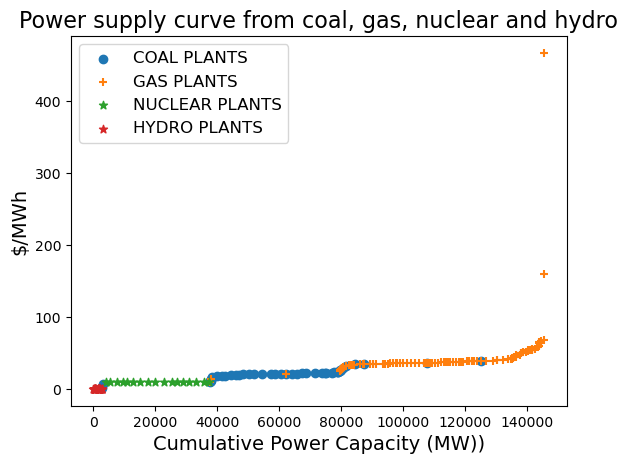

In [27]:
plt.scatter(coalSorted["CumCapacity[MW]"],coalSorted["short-run marginal cost"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted["CumCapacity[MW]"],gasSorted["short-run marginal cost"],marker="+",label="GAS PLANTS")
plt.scatter(nuclearSorted["CumCapacity[MW]"],nuclearSorted["short-run marginal cost"],marker="*",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CumCapacity[MW]"],hydroSorted["short-run marginal cost"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, nuclear and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)# adjust the font of legends "coal plants", "gas plants", etc 
#Add a caption that makes this plot a stand-alone piece of information

In [28]:
#Let's remove the gas last one plants in the merit order so we can see the distribution of prices more clearly without this outl
# This is optional
gasSorted2=gasSorted.iloc[0:len(gasSorted)-1].copy()

In [29]:
len(gasSorted)

108

In [30]:
len(gasSorted2)

107

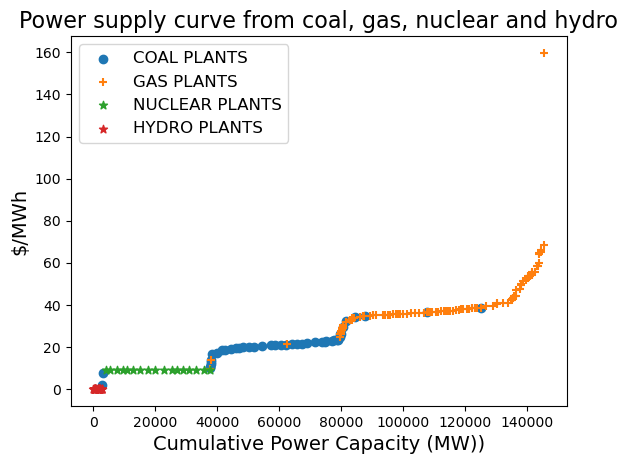

In [31]:
plt.scatter(coalSorted["CumCapacity[MW]"],coalSorted["short-run marginal cost"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted2["CumCapacity[MW]"],gasSorted2["short-run marginal cost"],marker="+",label="GAS PLANTS")
plt.scatter(nuclearSorted["CumCapacity[MW]"],nuclearSorted["short-run marginal cost"],marker="*",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CumCapacity[MW]"],hydroSorted["short-run marginal cost"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, nuclear and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

In [36]:
df_plnt_pjm.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
12587,Winfield,WV,HYDRO,"PJM Interconnection, LLC",0.47411,24.5,NaN,101754.000,NaN,0.0,24.5
7189,Gaston,NC,HYDRO,"PJM Interconnection, LLC",0.24196,177.6,NaN,376436.000,NaN,0.0,202.1
7552,Roanoke Rapids,NC,HYDRO,"PJM Interconnection, LLC",0.45787,100.0,NaN,401096.000,NaN,0.0,302.1
8215,Great Falls Hydro Project,NJ,HYDRO,"PJM Interconnection, LLC",0.14252,12.3,NaN,15356.001,NaN,0.0,314.4
12565,Marmet,WV,HYDRO,"PJM Interconnection, LLC",0.59779,14.4,NaN,75407.001,NaN,0.0,328.8
9577,Greenup Hydro,OH,HYDRO,"PJM Interconnection, LLC",0.37830,70.2,NaN,232635.000,NaN,0.0,399.0
9655,Racine,OH,HYDRO,"PJM Interconnection, LLC",0.30008,47.4,NaN,124599.000,NaN,0.0,446.4
12563,London,WV,HYDRO,"PJM Interconnection, LLC",0.53915,14.4,NaN,68010.000,NaN,0.0,460.8
12543,Belleville Dam,WV,HYDRO,"PJM Interconnection, LLC",0.58432,42.0,NaN,214982.000,NaN,0.0,502.8
10125,Allegheny Hydro No 9,PA,HYDRO,"PJM Interconnection, LLC",0.64862,17.8,NaN,101138.000,NaN,0.0,520.6


In [42]:
df_plnt_pjm['CumCapacity[MW]']

12587        24.5
7189        202.1
7552        302.1
8215        314.4
12565       328.8
           ...   
9680     144689.0
5373     144739.0
9571     145478.5
5307     145707.1
11978    145731.1
Name: CumCapacity[MW], Length: 206, dtype: float64

In [51]:
# search for the price correspond to the percentile of demand at 5% 10% 30% 50% 70% 90% 100% 
# 65,632.85 ；69,010.1； 79,286.10； 85,960.5； 96,233.8； 112,019.3； 143,864； 
df_price_5= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=65632.85]
df_price_10= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=69010.1]
df_price_30= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=79286.1]
df_price_50= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=85960.5]
df_price_70= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=96233.8]
df_price_90= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=112019.3]
df_price_100= df_plnt_pjm[df_plnt_pjm["CumCapacity[MW]"]>=143864]

In [52]:
len(df_plnt_pjm)

206

In [53]:
len(df_price_100)

8

In [54]:
df_price_100.head(10)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
10293,New Castle,PA,GAS,"PJM Interconnection, LLC",0.14865,424.4,6.338136e+06,552646.000,377066.431,59.637288,143986.7
8124,Bristol Myers Squibb Lawrenceville,NJ,GAS,"PJM Interconnection, LLC",0.21187,10.9,2.492830e+05,20230.000,14588.042,64.076698,143997.6
2682,GSA Central Heating,DC,GAS,"PJM Interconnection, LLC",0.52325,10.8,6.143997e+05,49504.000,35934.288,64.537787,144008.4
9680,Tait Electric Generating Station,OH,GAS,"PJM Interconnection, LLC",0.15971,680.6,1.192745e+07,952197.002,704459.300,65.136438,144689.0
5373,NIH Cogeneration Facility,MD,GAS,"PJM Interconnection, LLC",0.34195,50.0,1.899933e+06,149776.000,111153.594,65.962853,144739.0
9571,Fremont Energy Center,OH,GAS,"PJM Interconnection, LLC",0.29318,739.5,2.507274e+07,1899225.000,1491618.644,68.648132,145478.5
5307,Cove Point LNG Terminal,MD,GAS,"PJM Interconnection, LLC",0.30847,228.6,1.897857e+07,617726.999,1126290.306,159.760812,145707.1
11978,Radford Army Ammunition Plant,VA,GAS,"PJM Interconnection, LLC",0.15424,24.0,2.913001e+06,32428.000,170424.947,467.115037,145731.1


In [57]:
df_price_90.head(5)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
10222,Hickory Run Energy Station,PA,GAS,"PJM Interconnection, LLC",0.43500,1033.7,27905722.0,3938973.1,1659996.554,36.839489,112351.9
10234,Hunterstown Combined Cycle,PA,GAS,"PJM Interconnection, LLC",0.83527,898.0,46596373.0,6570656.0,2771970.538,36.876248,113249.9
11828,Bear Garden Generating Station,VA,GAS,"PJM Interconnection, LLC",0.87207,559.0,30382241.0,4270401.0,1807463.644,36.995976,113808.9
10194,Fayette Power Company LLC,PA,GAS,"PJM Interconnection, LLC",0.88171,644.1,35518016.0,4974896.0,2112920.559,37.125135,114453.0
10259,"Lower Mount Bethel Energy, LLC",PA,GAS,"PJM Interconnection, LLC",0.37932,651.6,15462154.0,2165186.0,919832.622,37.134547,115104.6


In [58]:
df_price_70.head(3)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
8381,Sewaren Generating Station,NJ,GAS,"PJM Interconnection, LLC",0.35569,1176.9,24978556.00,3667054.0,1487478.238,35.420392,96883.1
10263,"Marcus Hook Energy, LP",PA,GAS,"PJM Interconnection, LLC",0.70854,836.1,35422167.38,5189530.0,2107357.864,35.493632,97719.2
9610,Middletown Energy Center,OH,GAS,"PJM Interconnection, LLC",0.71069,543.9,23119568.00,3386139.0,1375361.610,35.504081,98263.1


In [59]:
df_price_50.head(3)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
11904,Greensville County Power Station,VA,GAS,"PJM Interconnection, LLC",0.68725,1773.3,70502052.0,10675865.0,4194082.832,34.340137,86154.6
10215,Hamilton Patriot Generation Plant,PA,GAS,"PJM Interconnection, LLC",0.81275,870.0,41129444.0,6194098.0,2446773.164,34.528532,87024.6
10144,Birdsboro Power,PA,GAS,"PJM Interconnection, LLC",0.78957,525.0,24210442.0,3631253.0,1440186.757,34.669658,87549.6


In [60]:
df_price_30.head(3)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
12012,Virginia City Hybrid Energy Center,VA,COAL,"PJM Interconnection, LLC",0.14869,668.0,1.079323e+07,870065.0,913770.655,24.562077,79648.5
8345,Princeton University Cogeneration,NJ,GAS,"PJM Interconnection, LLC",0.13825,32.0,1.852346e+05,38755.0,10837.142,24.854085,79680.5
5413,UMCP CHP Plant,MD,GAS,"PJM Interconnection, LLC",0.33452,27.4,4.005711e+05,80293.0,23436.295,25.942106,79707.9


In [61]:
df_price_10.head(3)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
9573,Gen J M Gavin,OH,COAL,"PJM Interconnection, LLC",0.57495,2600.0,146937432.0,13095165.0,1.518354e+07,22.217064,71461.5
9686,W H Sammis,OH,COAL,"PJM Interconnection, LLC",0.22189,2468.1,53871684.5,4797478.0,5.695844e+06,22.233752,73929.6
11859,Clover Power Station,VA,COAL,"PJM Interconnection, LLC",0.16701,848.0,13959582.0,1240625.0,1.443150e+06,22.279071,74777.6


In [62]:
df_price_5.head(3)

,PNAME,PSTATABB,PLFUELCT,BANAME,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,short-run marginal cost,CumCapacity[MW]
10151,"Brunner Island, LLC",PA,COAL,"PJM Interconnection, LLC",0.12933,1624.2,1.991880e+07,1840170.0,1.347141e+06,21.432376,65662.1
9522,Cardinal,OH,COAL,"PJM Interconnection, LLC",0.55000,1880.4,9.843259e+07,9059773.0,1.017196e+07,21.512298,67542.5
3952,Kincaid Generating Station,IL,COAL,"PJM Interconnection, LLC",0.12771,1319.0,1.618769e+07,1475564.0,1.712217e+06,21.721610,68861.5


In [65]:
df_price_5.drop?

In [64]:
pd.dataframe?

Object `pd.dataframe` not found.


In [67]:
pd.DataFrame?

Show graphically, how the market is cleared for an inelastic demand 
(i.e., in the same graph present both the supply curve and 
                                                                the vertical lines for percentiles of
                                                                     demand 5%, 50%, 90% and 100% in the 
                                                                     same graph. Their intersection is the price)

In [69]:
d = {'percentile': ['5%','50%','90%','100%'], 'demand_MW': [65632.85, 85960.5, 112019.3,143864]}
df_perdmd = pd.DataFrame(data=d)
df_perdmd

,percentile,demand_MW
0,5%,65632.85
1,50%,85960.50
2,90%,112019.30
3,100%,143864.00


<function matplotlib.pyplot.show(close=None, block=None)>

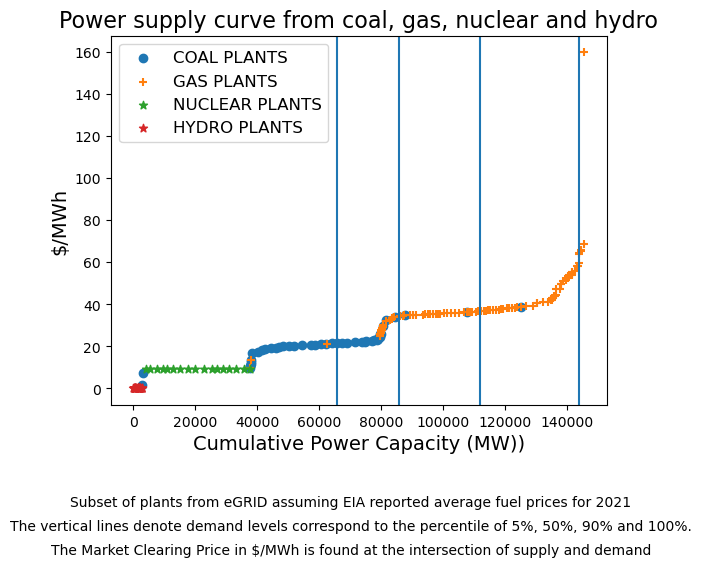

In [75]:
plt.scatter(coalSorted["CumCapacity[MW]"],coalSorted["short-run marginal cost"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted2["CumCapacity[MW]"],gasSorted2["short-run marginal cost"],marker="+",label="GAS PLANTS")
plt.scatter(nuclearSorted["CumCapacity[MW]"],nuclearSorted["short-run marginal cost"],marker="*",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted["CumCapacity[MW]"],hydroSorted["short-run marginal cost"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, nuclear and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW))", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

#Add a caption that makes this plot a stand-alone piece of information
txt2="Subset of plants from eGRID assuming EIA reported average fuel prices for 2021"
plt.figtext(0.5, -0.1, txt2, wrap=True, horizontalalignment='center', fontsize=10)
plt.axvline(x=df_perdmd.iloc[0,1]) # Plot the first vertical line (i.e.,the level in row zero
plt.axvline(x=df_perdmd.iloc[1,1]) # Plot the second vertical line
plt.axvline(x=df_perdmd.iloc[2,1]) # Plot the third vertical line
plt.axvline(x=df_perdmd.iloc[3,1])# Plot the fourth vertical line
## Add a note on the demands in the caption
txt3="The vertical lines denote demand levels correspond to the percentile of 5%, 50%, 90% and 100%."
plt.figtext(0.5, -0.15, txt3, wrap=True, horizontalalignment='center', fontsize=10)
txt4="The Market Clearing Price in $/MWh is found at the intersection of supply and demand"
plt.figtext(0.5, -0.2, txt4, wrap=True, horizontalalignment='center', fontsize=10)
# now show the plot
plt.show